In [2]:
from epsilon_transformers.process.GHMM import TransitionMatrixGHMM
import numpy as np
from epsilon_transformers.process.transition_matrices import get_matrix_from_args

In [11]:
#T = get_matrix_from_args("mess3")
#T = get_matrix_from_args("fanizza", alpha = 2000., lamb = 0.49)
T = get_matrix_from_args("tom_quantum", alpha=np.sqrt(50), beta=1.)
ghmm = TransitionMatrixGHMM(transition_matrix=T)
ghmm.name = "Tom Quantum"
msp = ghmm.derive_mixed_state_tree(depth=5)
paths = msp.paths
beliefs = msp.belief_states
unnorm_beliefs = msp.unnorm_belief_states
probs = msp.path_probs


In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extract x, y, z coordinates from beliefs
x_beliefs = [belief[0, 0] for belief in beliefs]
y_beliefs = [belief[0, 1] for belief in beliefs]
z_beliefs = [belief[0, 2] for belief in beliefs]

# Extract x, y, z coordinates from unnorm_beliefs
x_unnorm_beliefs = [belief[0, 0] for belief in unnorm_beliefs]
y_unnorm_beliefs = [belief[0, 1] for belief in unnorm_beliefs]
z_unnorm_beliefs = [belief[0, 2] for belief in unnorm_beliefs]

# Create a subplot with two columns, specifying 3D subplot types
fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]], 
    subplot_titles=("Beliefs", "Unnormed Beliefs")
)

# Add 3D scatter plot for beliefs
fig.add_trace(go.Scatter3d(
    x=x_beliefs,
    y=y_beliefs,
    z=z_beliefs,
    mode='markers',
    marker=dict(
        size=2,
        color=z_beliefs,        # set color to an array/list of z values
        colorscale='Viridis',   # choose a colorscale
        opacity=1.0
    )
), row=1, col=1)

# Add 3D scatter plot for unnormed beliefs
fig.add_trace(go.Scatter3d(
    x=x_unnorm_beliefs,
    y=y_unnorm_beliefs,
    z=z_unnorm_beliefs,
    mode='markers',
    marker=dict(
        size=2,
        color=z_unnorm_beliefs, # set color to an array/list of z values
        colorscale='Viridis',   # choose a colorscale
        opacity=1.0
    )
), row=1, col=2)

# Set plot title and axis labels
fig.update_layout(
    title='3D Scatter Plot of Beliefs and Unnormed Beliefs',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Show the plot
fig.show()


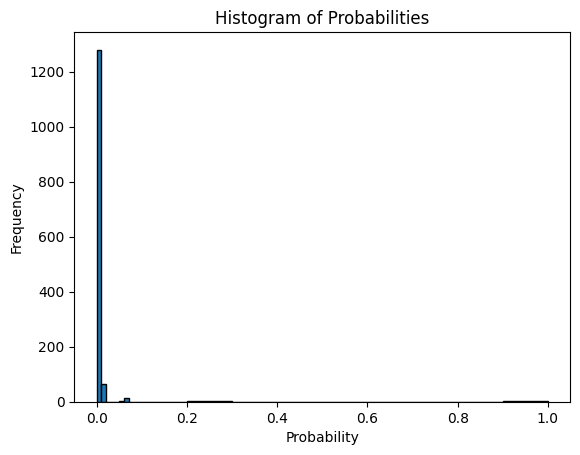

In [15]:
import matplotlib.pyplot as plt
bins = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.hist(probs, bins=bins, edgecolor='black')
plt.title('Histogram of Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()